# Feature Scaling



In [2]:
import numpy as np
import pandas as pd

<hr>

### D. Robust Scaler

- Robust scaler formula $\displaystyle x' = \frac {x - \textrm{median}(x)} {\textrm{IQR}} = \frac {x - Q_2} {Q_3 - Q_1}$

- Bagus digunakan pada data dengan banyak outliers.

In [3]:
df = pd.DataFrame({
    'TB': [1.72, 1.81, 1.93, 1.67, 1.85, 1.66, 1.59, 1.76, 1.88, 1.78],
    'BB': [76, 65, 87, 55, 60, 78, 98, 77, 74, 64]
})
df.head(2)

,TB,BB
0,1.72,76
1,1.81,65


<hr>

### D1. Manual Calculation

In [5]:
# find q1, q2 (median), q3
q1TB = np.quantile(df['TB'], .25)
q2TB = np.quantile(df['TB'], .5)
medTB = np.median(df['TB'])
q3TB = np.quantile(df['TB'], .75)

q1BB = np.quantile(df['BB'], .25)
q2BB = np.quantile(df['BB'], .5)
medBB = np.median(df['BB'])
q3BB = np.quantile(df['BB'], .75)

print(q1TB, q2TB, medTB, q3TB)
print(q1BB, q2BB, medBB, q3BB)

1.6824999999999999 1.77 1.77 1.8400000000000003
64.25 75.0 75.0 77.75


In [6]:
df['rsTB'] = (df['TB'] - q2TB) / (q3TB - q1TB)
df['rsBB'] = (df['BB'] - q2BB) / (q3BB - q1BB)
df

,TB,BB,rsTB,rsBB
0,1.72,76,-0.317460,0.074074
1,1.81,65,0.253968,-0.740741
2,1.93,87,1.015873,0.888889
3,1.67,55,-0.634921,-1.481481
4,1.85,60,0.507937,-1.111111
5,1.66,78,-0.698413,0.222222
6,1.59,98,-1.142857,1.703704
7,1.76,77,-0.063492,0.148148
8,1.88,74,0.698413,-0.074074
9,1.78,64,0.063492,-0.814815


<hr>

### D2. Sklearn ```RobustScaler()```

In [7]:
from sklearn.preprocessing import RobustScaler

In [8]:
scaler = RobustScaler()
scaler.fit(df[['TB', 'BB']])
rs = scaler.transform(df[['TB', 'BB']])

df['rsTB2'] = rs[:, 0]
df['rsBB2'] = rs[:, 1]
df

,TB,BB,rsTB,rsBB,rsTB2,rsBB2
0,1.72,76,-0.317460,0.074074,-0.317460,0.074074
1,1.81,65,0.253968,-0.740741,0.253968,-0.740741
2,1.93,87,1.015873,0.888889,1.015873,0.888889
3,1.67,55,-0.634921,-1.481481,-0.634921,-1.481481
4,1.85,60,0.507937,-1.111111,0.507937,-1.111111
5,1.66,78,-0.698413,0.222222,-0.698413,0.222222
6,1.59,98,-1.142857,1.703704,-1.142857,1.703704
7,1.76,77,-0.063492,0.148148,-0.063492,0.148148
8,1.88,74,0.698413,-0.074074,0.698413,-0.074074
9,1.78,64,0.063492,-0.814815,0.063492,-0.814815


In [10]:
# mengembalikan ke value semula / inverse transform
inrs = scaler.inverse_transform(df[['rsTB2', 'rsBB2']])
df['inrsTB'] = inrs[:, 0]
df['inrsBB'] = inrs[:, 1]
df

,TB,BB,rsTB,rsBB,rsTB2,rsBB2,inrsTB,inrsBB
0,1.72,76,-0.317460,0.074074,-0.317460,0.074074,1.72,76.0
1,1.81,65,0.253968,-0.740741,0.253968,-0.740741,1.81,65.0
2,1.93,87,1.015873,0.888889,1.015873,0.888889,1.93,87.0
3,1.67,55,-0.634921,-1.481481,-0.634921,-1.481481,1.67,55.0
4,1.85,60,0.507937,-1.111111,0.507937,-1.111111,1.85,60.0
5,1.66,78,-0.698413,0.222222,-0.698413,0.222222,1.66,78.0
6,1.59,98,-1.142857,1.703704,-1.142857,1.703704,1.59,98.0
7,1.76,77,-0.063492,0.148148,-0.063492,0.148148,1.76,77.0
8,1.88,74,0.698413,-0.074074,0.698413,-0.074074,1.88,74.0
9,1.78,64,0.063492,-0.814815,0.063492,-0.814815,1.78,64.0


<hr>

#### Apakah Robust Scaler merubah sebaran data?

Tidak

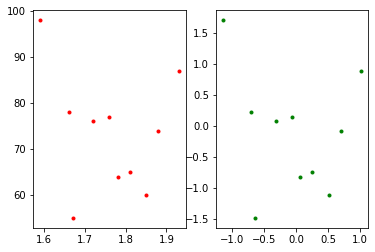

In [11]:
import matplotlib.pyplot as plt

plt.subplot(121)
plt.plot(df['TB'], df['BB'], 'r.')
plt.subplot(122)
plt.plot(df['rsTB'], df['rsBB'], 'g.')
plt.show()